<a href="https://colab.research.google.com/github/priyanka12177/AML/blob/project1/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pandas is mainly used for data analysis. Pandas allows importing data from various file formats 
# such as comma-separated values, JSON, SQL, Microsoft Excel. 
# Pandas allows various data manipulation operations such as merging, reshaping, selecting, 
# as well as data cleaning, and data wrangling features.
# NumPy has support for large, multi-dimensional arrays and matrices, along with 
# a large collection of high-level mathematical functions to operate on these arrays.
# Import matplotlib  to visualize the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model as l



In [2]:
#Read raw filefrom github into a dataframe
#forest_data: Amounts of area burn in the forest because of different parameters like Temperature,humidity,wind and rain

df = pd.read_csv('https://raw.githubusercontent.com/priyanka12177/AML/project1/forestfires.csv')

In [3]:
#head function is used to get the first 5 rows
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
# simple linear regression for the forest area burn with repect to temperatures
lm = l.LinearRegression()

# another way to reshape is to add an extra column; -1 means we don't specify #rows
# x is temperature and y is area
x = df['temp'].values.reshape(-1,1)
y = df['area'].values.reshape(-1,1)

# Fit the model using .fit() method
lm.fit(x, y)

# intercept and slope values
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(-7.413751564770022, 1.072627621060047)

Linear Model: Area = -7.414 + 1.073 * temp

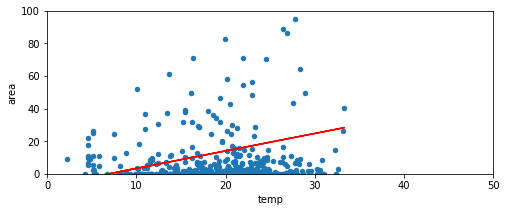

In [5]:
# scatter plot for the forest area burn with repect to temperatures
df.plot(kind='scatter', x='temp', y='area', figsize=(8, 3))

plt.axis([0, 50, 0, 100])

plt.plot(x, t0 + t1*x, "r")

plt.show()

In [6]:
# Split the data into training and testing sets
# random_state control the shuffling of input data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [7]:
# checking the number of rows and columns for train data for area vs temp
x_train.shape

(413, 1)

In [8]:
# checking the number of rows and columns for test data for area vs temp
x_test.shape

(104, 1)

In [9]:
#fitting the linear regression on training data for area vs temp
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [-12.01798625]
Slope : [[1.36887159]]


Linear Model: Area = -12.018 + 1.369 * temp

In [10]:
# Let's make predictions on the data and evaluate the model using the R² and MSE values
'''
R2 is a statistic that will give some information about the goodness of fit of a model. 
In regression, the R2 coefficient of determination is a statistical measure of how well 
the regression predictions approximate the real data points. An R2 of 1 indicates that 
the regression predictions perfectly fit the data.
'''
from sklearn.metrics import r2_score, mean_squared_error

# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)

m1_r2_score = r2_score(y_test, y_test_pred)
m1_mse = mean_squared_error(y_test, y_test_pred)

print('R2 score:',            r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score: -0.11059902589371906
Mean squared error: 938.272869872064


In [11]:
#simple linear regression for the forest area burn and relative humidity
lm = l.LinearRegression()

# another way to reshape is to add an extra column; -1 means we don't specify #rows
# x is temperature and y is area

x = df['RH'].values.reshape(-1,1)
y = df['area'].values.reshape(-1,1)



# Fit the model using .fit() method
lm.fit(x, y)

# intercept and slope values
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(25.894784845023256, -0.2946042610331932)

Linear Model: Area = 25.895-0.295 * RH

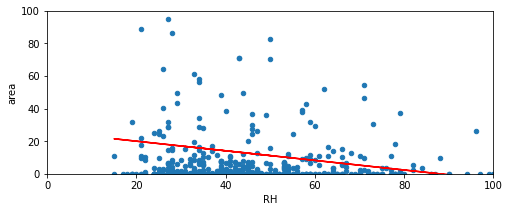

In [12]:
# scatter plot for the forest area burn with repect to Relative humidity
df.plot(kind='scatter', x='RH', y='area', figsize=(8, 3))

plt.axis([0, 100, 0, 100])

plt.plot(x, t0 + t1*x, "r")

plt.show()

In [13]:
# Split the data into training and testing sets for  area vs relative humidity
# random_state control the shuffling of input data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [14]:
# checking the number of rows and columns for train data for area vs relative humidity
x_train.shape

(413, 1)

In [15]:
# checking the number of rows and columns for train data for area vs relative humidity
x_test.shape

(104, 1)

In [16]:
#fitting the linear regression on training data for area vs relative humidity
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [29.37563009]
Slope : [[-0.35699106]]


Linear Model: Area =29.376 -0.357* RH





In [17]:
# Let's make predictions on the data and evaluate the model using the R² and MSE values
'''
R2 is a statistic that will give some information about the goodness of fit of a model. 
In regression, the R2 coefficient of determination is a statistical measure of how well 
the regression predictions approximate the real data points. An R2 of 1 indicates that 
the regression predictions perfectly fit the data.
'''
from sklearn.metrics import r2_score, mean_squared_error

# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)

m2_r2_score = r2_score(y_test, y_test_pred)
m2_mse = mean_squared_error(y_test, y_test_pred)

print('R2 score of RH:',            r2_score(y_test, y_test_pred))
print('Mean squared error for RH:', mean_squared_error(y_test, y_test_pred))

R2 score of RH: -0.04845187467769896
Mean squared error for RH: 885.7687846295037


In [18]:
# Let's use simple linear regression for the forest area burn and wind
lm = l.LinearRegression()

# another way to reshape is to add an extra column; -1 means we don't specify #rows
# x is wind and y is area

x = df['wind'].values.reshape(-1,1)
y = df['area'].values.reshape(-1,1)

# Fit the model using .fit() method
lm.fit(x, y)

# intercept and slope values
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(11.089101812334118, 0.43762185885285254)

Linear Model: Area = 11.089 + 0.4376 * wind

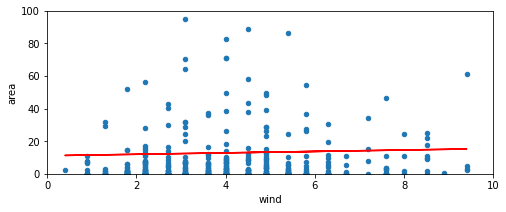

In [19]:
# scatter plot for the forest area burn with repect to wind
df.plot(kind='scatter', x='wind', y='area', figsize=(8, 3))

plt.axis([0, 10, 0, 100])

plt.plot(x, t0 + t1*x, "r")

plt.show()

In [20]:
# Let's experiment again, but this time split the data into training and testing sets for area vs wind
# random_state control the shuffling of input data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [21]:
# checking the number of rows and columns for train data for area vs wind
x_train.shape

(413, 1)

In [22]:
# checking the number of rows and columns for train data for area vs wind
x_test.shape

(104, 1)

In [23]:
#fitting the linear regression on training data for area vs wind
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [11.94571583]
Slope : [[0.44053305]]


Linear Model: Area = 11.946+ 0.440 * wind




In [24]:
# Let's make predictions on the data and evaluate the model using the R² and MSE values
'''
R2 is a statistic that will give some information about the goodness of fit of a model. 
In regression, the R2 coefficient of determination is a statistical measure of how well 
the regression predictions approximate the real data points. An R2 of 1 indicates that 
the regression predictions perfectly fit the data.
'''
from sklearn.metrics import r2_score, mean_squared_error

# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)

m3_r2_score = r2_score(y_test, y_test_pred)
m3_mse = mean_squared_error(y_test, y_test_pred)


print('R2 score of wind:',            r2_score(y_test, y_test_pred))
print('Mean squared error for wind:', mean_squared_error(y_test, y_test_pred))

R2 score of wind: -0.021974822191322962
Mean squared error for wind: 863.4000453789413


In [25]:
# Let's use simple linear regression for the forest area burn and Rain
lm = l.LinearRegression()

# another way to reshape is to add an extra column; -1 means we don't specify #rows
# x is rain and y is area

x = df['rain'].values.reshape(-1,1)
y = df['area'].values.reshape(-1,1)

# Fit the model using .fit() method
lm.fit(x, y)

# intercept and slope values
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(12.881612253841306, -1.5842442174960942)

Linear Model: Area = 12.882 -1.584 * rain

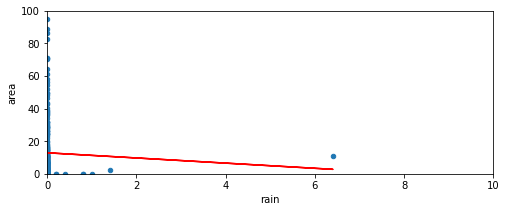

In [26]:
# scatter plot for the forest area burn with repect to rain
df.plot(kind='scatter', x='rain', y='area', figsize=(8, 3))

plt.axis([0, 10, 0, 100])

plt.plot(x, t0 + t1*x, "r")

plt.show()

In [27]:
# Let's experiment again, but this time split the data into training and testing sets area vs rain
# random_state control the shuffling of input data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [28]:
# checking the number of rows and columns for train data for area vs rain
x_train.shape

(413, 1)

In [29]:
# checking the number of rows and columns for train data for area vs rain
x_test.shape

(104, 1)

In [30]:
#fitting the linear regression on training data for area vs rain
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [13.77120025]
Slope : [[-1.62884002]]


Linear Model: Area = 13.771-1.629 * rain





In [31]:
# Let's make predictions on the data and evaluate the model using the R² and MSE values
'''
R2 is a statistic that will give some information about the goodness of fit of a model. 
In regression, the R2 coefficient of determination is a statistical measure of how well 
the regression predictions approximate the real data points. An R2 of 1 indicates that 
the regression predictions perfectly fit the data.
'''
from sklearn.metrics import r2_score, mean_squared_error

# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)

m4_r2_score = r2_score(y_test, y_test_pred)
m4_mse = mean_squared_error(y_test, y_test_pred)


print('R2 score of rain:',            r2_score(y_test, y_test_pred))
print('Mean squared error for rain:', mean_squared_error(y_test, y_test_pred))

R2 score of rain: -0.02289617576001013
Mean squared error for rain: 864.1784370728861


In [32]:
#Creating Dataframes for different models
df1 = pd.DataFrame({'R2_square': m1_r2_score, 'MSE_ERROR': m1_mse}, index=['model1'])
df2 = pd.DataFrame({'R2_square': m2_r2_score, 'MSE_ERROR': m2_mse}, index=['model2'])
df3 = pd.DataFrame({'R2_square': m3_r2_score, 'MSE_ERROR': m3_mse}, index=['model3'])
df4 = pd.DataFrame({'R2_square': m4_r2_score, 'MSE_ERROR': m4_mse}, index=['model4'])


In [33]:
# Concatinating the dataframes to get the table
final = pd.concat([df1,df2,df3,df4])
final

,R2_square,MSE_ERROR
model1,-0.110599,938.272870
model2,-0.048452,885.768785
model3,-0.021975,863.400045
model4,-0.022896,864.178437
